Framework Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

sns.set_style('whitegrid')

Data Collection, Cleaning, dan Augmentation

In [2]:
# Data collection
dataset_path = 'https://raw.githubusercontent.com/ghifarullah19/projek-makro/main/dataset/mental_health_disorder_symptoms_ver2.csv'
df = pd.read_csv(dataset_path)

In [3]:
# Menampilkan 5 data teratas
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [5]:
# Merubah nama kolom
df = df.rename(columns={'ag+1:629e':'age',
                        'having.trouble.in.sleeping':'trouble.sleeping',
                        'having.trouble.with.work':'trouble.with.work',
                        'having.nightmares':'nightmares'})

df.set_index(['age'])

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,
23,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,MDD
14,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,ASD
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
29,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,bipolar
32,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
27,1,0,1,0,0,0,0,1,1,0,...,1,0,1,1,1,0,0,0,0,PDD
19,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,ASD


In [6]:
# Menngubah nama gejala penyakit
df = df.rename({'blamming.yourself':'blaming.yourself'}, axis=1)
df.columns

Index(['age', 'feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'trouble.sleeping', 'trouble.with.work',
       'hopelessness', 'anger', 'over.react', 'change.in.eating',
       'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blaming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')

In [7]:
# Menampilkan apakah ada nilai null
df[df.isna().any(axis=1)]

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [8]:
# Menampilkan apakah ada nilai diluar 0 dan 1
errors = df[(df.iloc[:, 1:27] > 1).any(axis=1)]
errors

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


c:\Users\ghifarullah19\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

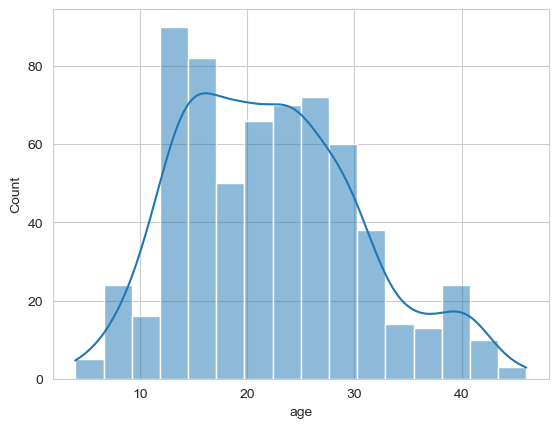

In [9]:
# Menampilkan grafik distribusi umur
sns.histplot(df.age, kde=True)

In [10]:
# Menghitung jumlah gejala penyakit
symptom_disease = df[df.columns[1:27]].sum()

<Axes: title={'center': 'Gejala dari beberapa Gangguan Kesehatan Mental'}>

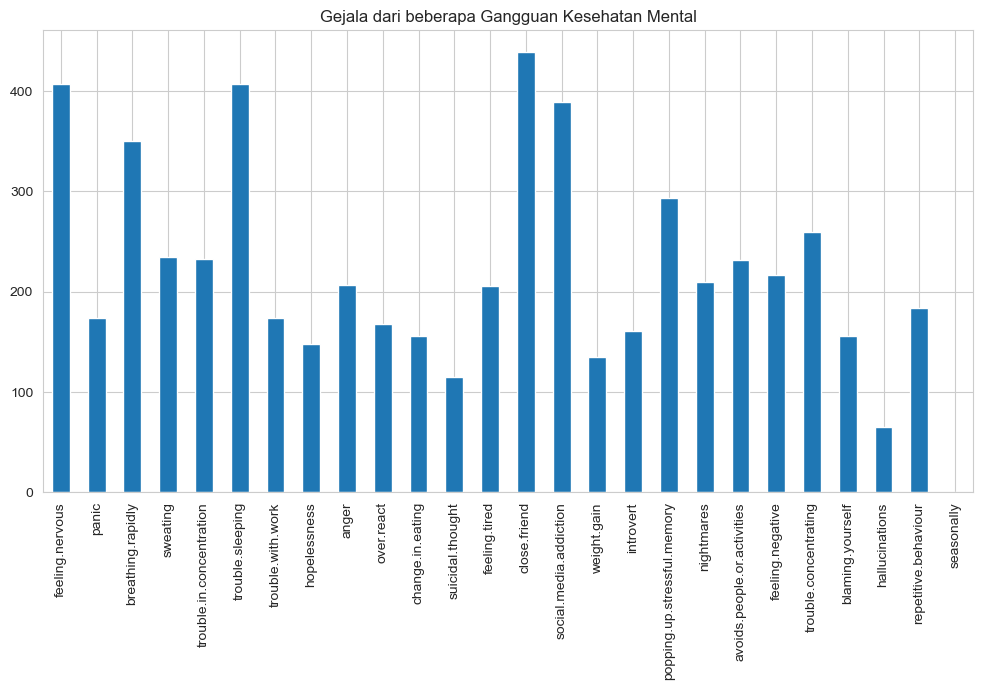

In [11]:
# Menampilkan grafik jumlah gejala penyakit
symptom_disease.plot.bar(figsize=(12,6), title='Gejala dari beberapa Gangguan Kesehatan Mental')

In [12]:
# Mendapatkan penyakit di dataset
Disorders = df.Disorder.unique()
Disorders

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

In [13]:
# Mengganti nama penyakit di dataset
df.Disorder = df.Disorder.str.replace('psychotic deprission', 'psychot depresn')
df.Disorder = df.Disorder.str.replace('sleeping disorder', 'sleep disord')
df.Disorder = df.Disorder.str.replace('anexiety', 'anxiety')
df.Disorder = df.Disorder.str.replace('eating disorder', 'ED')

Disorders = df.Disorder.unique().tolist()

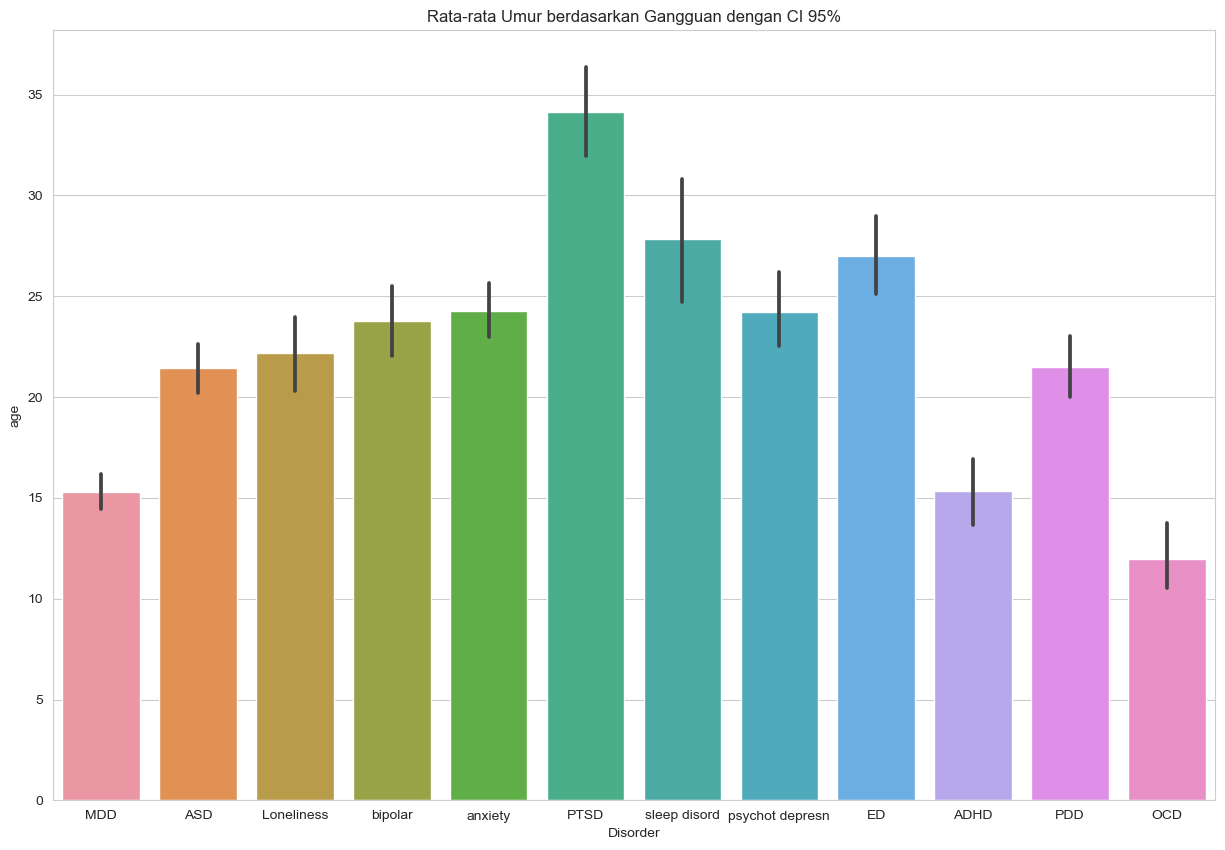

In [14]:
# Menampilkan grafik rata-rata umur berdasarkan penyakit
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='Disorder', y='age', estimator=np.mean).set_title('Rata-rata Umur berdasarkan Gangguan dengan CI 95%')
plt.show()

<Axes: xlabel='Disorder'>

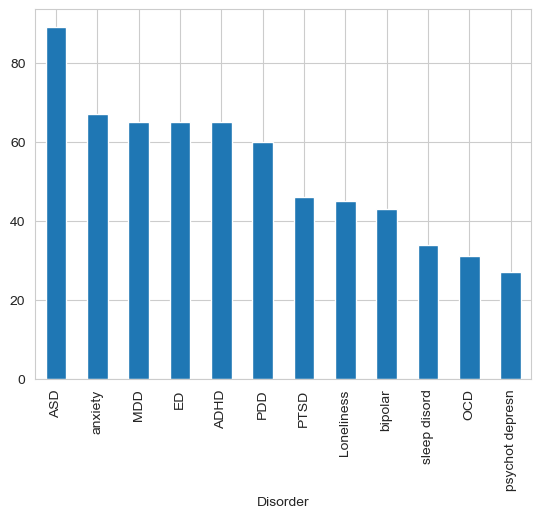

In [15]:
# Menampilkan grafik jumlah penyakit
disease = df.Disorder.value_counts()
disease.plot.bar()

In [16]:
# Menampilkan dataset
df

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,ED
633,27,1,0,1,0,0,0,0,1,1,...,1,0,1,1,1,0,0,0,0,PDD
634,19,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,ASD
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness


Model Building dan Training

In [17]:
# Menghapus kolom 'Disorder' dari dataframe df dan menyimpan hasilnya ke dalam variabel X.
X = df.drop(['Disorder'], axis=1)

In [18]:
# Menyimpan kolom 'Disorder' ke dalam variabel y
y = df['Disorder']

In [19]:
# Membagi dataset menjadi data training dan data testing
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.15,random_state=42)

In [20]:
# Melakukan skalasi
scaler = StandardScaler() # Inisialisasi StandardScaler
train_X_scaled = scaler.fit_transform(train_X) # Melakukan fit dan transform pada data training
val_X_scaled = scaler.transform(val_X) # Melakukan transform pada data testing

In [21]:
# Melakukan encoding pada
label_encoder = LabelEncoder() # Inisialisasi LabelEncoder
train_y_encoded = label_encoder.fit_transform(train_y) # Melakukan fit dan transform pada data training
train_y_one_hot = tf.keras.utils.to_categorical(train_y_encoded) # Mengubah label menjadi one-hot encoding

In [22]:
# Inisialisasi model neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='sigmoid', input_shape=(train_X_scaled.shape[1],))
])

c:\Users\ghifarullah19\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile model
model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall'])


Model Evaluation dan Validation

In [24]:
# Melakukan training model
model.fit(train_X_scaled, train_y_one_hot, epochs=200, batch_size=8, verbose=2)

Epoch 1/200
68/68 - 6s - 87ms/step - accuracy: 0.2403 - loss: 0.7655 - precision: 0.0940 - recall: 0.5693
Epoch 2/200
68/68 - 0s - 6ms/step - accuracy: 0.4067 - loss: 0.6899 - precision: 0.1303 - recall: 0.7375
Epoch 3/200
68/68 - 0s - 5ms/step - accuracy: 0.5582 - loss: 0.6282 - precision: 0.1627 - recall: 0.8226
Epoch 4/200
68/68 - 0s - 4ms/step - accuracy: 0.6617 - loss: 0.5772 - precision: 0.1978 - recall: 0.8725
Epoch 5/200
68/68 - 0s - 5ms/step - accuracy: 0.7227 - loss: 0.5344 - precision: 0.2429 - recall: 0.8891
Epoch 6/200
68/68 - 0s - 5ms/step - accuracy: 0.8410 - loss: 0.4972 - precision: 0.2961 - recall: 0.9519
Epoch 7/200
68/68 - 0s - 5ms/step - accuracy: 0.8540 - loss: 0.4649 - precision: 0.3393 - recall: 0.9519
Epoch 8/200
68/68 - 0s - 4ms/step - accuracy: 0.8540 - loss: 0.4365 - precision: 0.3843 - recall: 0.9519
Epoch 9/200
68/68 - 0s - 4ms/step - accuracy: 0.8909 - loss: 0.4107 - precision: 0.4490 - recall: 0.9519
Epoch 10/200
68/68 - 0s - 5ms/step - accuracy: 0.9353 

In [25]:
# Melakukan evaluasi model
val_y_encoded = label_encoder.transform(val_y) # Melakukan transform pada data testing
val_y_one_hot = tf.keras.utils.to_categorical(val_y_encoded) # Mengubah label menjadi one-hot encoding

loss, accuracy, precision, recall = model.evaluate(val_X_scaled, val_y_one_hot) # Evaluasi model

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9909 - loss: 0.0070 - precision: 0.9909 - recall: 0.9909  


In [26]:
# Menampilkan hasil evaluasi
print("Accuracy: ", accuracy) # Menampilkan akurasi
print("Precision: ", precision) # Menampilkan precision
print("Recall: ", recall) # Menampilkan recall
print("Loss: ", loss) # Menampilkan loss

Accuracy:  0.9895833134651184
Precision:  0.9895833134651184
Recall:  0.9895833134651184
Loss:  0.0064666434191167355


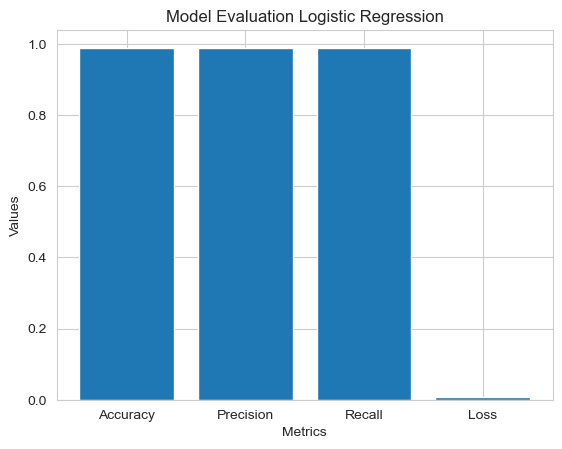

In [27]:
import matplotlib.pyplot as plt

# Membuat metrik untuk diagram batang garis x
metrics = ['Accuracy', 'Precision', 'Recall', 'Loss']
# Membuat nilai untuk diagram batang garis y
values = [accuracy, precision, recall, loss]

# Membuat diagram batang
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Logistic Regression')
plt.show()